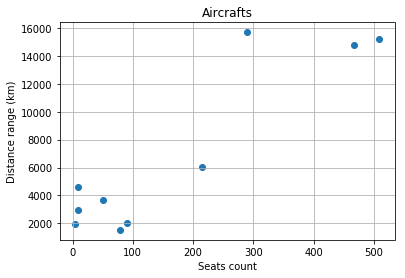

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random

X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])
x1 = np.array(X[:,0])
x2 = np.array(X[:,1])


fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

In [39]:
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

In [40]:
m = 2
error_margin = 0.01


centers = []
groups = 2
assignation = np.random.rand( len(X_norm), groups)

assignation

array([[0.00549494, 0.66922226],
       [0.80551094, 0.38303284],
       [0.97346749, 0.34102628],
       [0.4343033 , 0.17025984],
       [0.04990775, 0.94569537],
       [0.32017765, 0.50224872],
       [0.60446159, 0.036133  ],
       [0.99782275, 0.54340938],
       [0.697136  , 0.28883889],
       [0.23226986, 0.25012989]])

In [41]:

def mahalanobis_distance(x, v):
    sub = x - v
    inv = np.identity(len(x))
    return np.sqrt(np.dot(np.dot(sub.T, inv), sub))

def calculate_u(x,k):
    global centers
    sum1=(1+(mahalanobis_distance(x, centers[k])/calculate_eta(x, centers[k],k))**2)**-1
    return sum1

def calculate_eta(xx,yy,i):
    global assignation
    global data_set
    global groups
    return sum( assignation[i][k]**2*mahalanobis_distance(xx,yy)**2 for k in range(groups))/sum( assignation[i][k]**2 for k in range(groups))

In [42]:
import random

centers = []
space=[[0,1],[0,1]]

def select_centers():
    global centers
    global groups
    global space
    iter=0
    while iter<groups:
        centers.append((random.uniform(space[0][0],space[0][1]), 
                        random.uniform(space[1][0],space[1][1])))
        iter=iter+1
        
select_centers()

In [43]:
def calculate_differences(new_assignation):
    global assignation    
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

In [44]:
def calculate_new_centers(u):
    global centers
    new_centers=[]
    for k in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(X_norm)):
            u_scalar = u_scalar+(u[i][k]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][k]**m, X_norm[i]))
        assert(u_scalar != 0)
        new_centers.append(np.divide(u_x_vector,u_scalar))
    centers=new_centers

In [45]:
def cluster():
    global assignation    
    global error_margin    
    global groups
    difference_limit_not_achieved=True
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(X_norm)):
            new_assignation_vector=[]
            for k in range(groups):
                new_assignation_vector.append(calculate_u(X_norm[i],k))
            new_assignation.append(new_assignation_vector)
        calculate_new_centers(new_assignation)

        if iter>0:
            if calculate_differences(new_assignation) < error_margin or iter > 10:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1

In [46]:
select_centers()
centers

[(0.07488309585460451, 0.1827415854310941),
 (0.177361197323482, 0.5181527137111479),
 (0.10305448927234118, 0.11646326824679687),
 (0.692727363123342, 0.24014623627152987)]

In [47]:
assignation

array([[0.00549494, 0.66922226],
       [0.80551094, 0.38303284],
       [0.97346749, 0.34102628],
       [0.4343033 , 0.17025984],
       [0.04990775, 0.94569537],
       [0.32017765, 0.50224872],
       [0.60446159, 0.036133  ],
       [0.99782275, 0.54340938],
       [0.697136  , 0.28883889],
       [0.23226986, 0.25012989]])

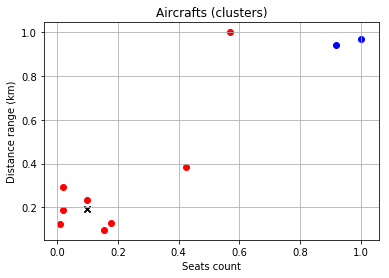

In [48]:
cluster()
global assignation
red = X_norm[np.where(np.array(assignation)[:,0] > np.array(assignation)[:,1])]
blue = X_norm[np.where(np.array(assignation)[:,0] < np.array(assignation)[:,1])]

fig, ax = plt.subplots()

ax.scatter(blue[:,0], blue[:,1],c = 'blue')
ax.scatter(red[:,0], red[:,1], c = 'red')
ax.scatter(np.array(centers)[:,0], np.array(centers)[:,1], marker='x', c='black')
ax.set(xlabel = 'Seats count', 
       ylabel = 'Distance range (km)',
       title = 'Aircrafts (clusters)')
ax.grid()
plt.show()